# Data Preparation

## Import and Settings

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
import dask
import dask.dataframe as dd
import dask.array as da

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

In [5]:
df = dd.read_csv('explored_ds.csv')

In [6]:
# allocating columns
category_vars_no_order = ['Label', 'Protocol','SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'dst_port_transformed', 'src_port_transformed']
category_vars = [i for i in df.columns if i in category_vars_no_order]

object_vars = ['Dst IP', 'Src IP'] #df.select_dtypes(include=['object']).columns
continuous_vars = df.columns[~df.columns.isin(category_vars) & ~df.columns.isin(object_vars)]

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
df.head()

,Src IP,Dst IP,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,dst_port_transformed,src_port_transformed
0,18.219.193.20,172.31.69.25,6,8660,1,1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,230.946882,8660.000000,0.000000,8660.0,8660.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,32,32,115.473441,115.473441,0.0,0.0,0.000,0.000000,0.000000,0,0,0,1,0,0,1.0,0.000000,0.00,0.000000,1,0,1,0,-1,225,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos,System,User
1,172.31.69.28,18.219.9.1,6,5829,4,3,935.0,298.0,935.0,0.0,233.75,467.5,298.0,0.0,99.333333,172.050380,211528.564076,1200.892091,971.500000,2104.124973,5260.0,7.0,5822.0,1940.666667,3119.411857,5541.0,46.0,5540.0,2770.0,3521.391770,5260.0,280.0,92,72,686.224052,514.668039,0.0,935.0,154.125,332.306415,110427.553571,1,0,0,0,1,1,0.0,176.142857,233.75,99.333333,4,935,3,298,-1,32768,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos,Dynamic,System
2,52.14.136.135,172.31.69.28,6,3396,1,1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,588.928151,3396.000000,0.000000,3396.0,3396.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,20,20,294.464075,294.464075,0.0,0.0,0.000,0.000000,0.000000,0,0,0,1,0,0,1.0,0.000000,0.00,0.000000,1,0,1,0,-1,32738,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos,System,Dynamic
3,18.216.200.189,172.31.69.28,6,2390,1,1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,836.820084,2390.000000,0.000000,2390.0,2390.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,20,20,418.410042,418.410042,0.0,0.0,0.000,0.000000,0.000000,0,0,0,1,0,0,1.0,0.000000,0.00,0.000000,1,0,1,0,-1,32738,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos,System,Dynamic
4,172.31.69.28,18.218.55.126,6,17362,4,3,935.0,314.0,935.0,0.0,233.75,467.5,314.0,0.0,104.666667,181.287985,71938.716738,403.179357,2893.666667,6770.577661,16711.0,7.0,17355.0,5785.000000,9779.680414,17077.0,38.0,17074.0,8537.0,11559.781659,16711.0,363.0,92,72,230.388204,172.791153,0.0,935.0,156.125,333.342568,111117.267857,1,0,0,0,1,1,0.0,178.428571,233.75,104.666667,4,935,3,314,-1,32768,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos,Dynamic,System


---
## PCA

In [18]:
# scale data to reduce influence of large values
x = StandardScaler().fit_transform(df[continuous_vars].values)

c:\users\basti\documents\coding\python-venv\data-exploration-project\lib\site-packages\dask\array\core.py:1508: FutureWarning: The `numpy.may_share_memory` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


### Prining Compoments Composition

The first 50 principle components are calculated to determine a good amount of components in the following.

In [19]:
pca = PCA(n_components='mle')
principalComponents = pca.fit_transform(x)

In [38]:
for i in range(len(pca.explained_variance_ratio_)):
    print(i, sum(pca.explained_variance_ratio_[:i]))

0 0
1 0.20932428869807265
2 0.35610328838369343
3 0.46553596176695505
4 0.5448814613763089
5 0.613165172612473
6 0.6688127592203327
7 0.7199305475711294
8 0.7633042448003077
9 0.7993382087604541
10 0.8253028153966913
11 0.8445716085283931
12 0.8618512419560165
13 0.8783039915247354
14 0.8941393503067953
15 0.9089626938457525
16 0.9230413707863298
17 0.9363785251572201
18 0.949098189244593
19 0.9601937238445795
20 0.9685784499440704
21 0.9751423645805237
22 0.9802966507971731
23 0.9853067761949474
24 0.989264205586049
25 0.9920875258843463
26 0.9939633140456021
27 0.995171003645384
28 0.9962159559444782
29 0.9969725791759717
30 0.9976074982319616
31 0.9981691530291058
32 0.9986581191306899
33 0.9989734681912218
34 0.9992292132289573
35 0.9994017854162343
36 0.9995482800725237
37 0.9996503583886558
38 0.9997434407697875
39 0.9998237699681878
40 0.9998765593199337
41 0.9999126816563456
42 0.999942035618788
43 0.9999554614216866
44 0.9999686184733957
45 0.9999792640722691
46 0.999987174006

In [20]:
# rename columns with PC-{#component}
col_names = []
for i in range(principalComponents.shape[1]):
    col_names.append(f'PC-{i}')
principalDf = pd.DataFrame(data = principalComponents, columns = col_names)

In [21]:
df_label = df['Label'].compute()

In [22]:
# add label to PCs
df_pca = pd.concat([principalDf, df_label.reset_index()['Label']], axis = 1)

### Logistic Regression for Test Purposes

Multiple logistic regression models are trained to get insights about the principle components. We choose the amount of components which result in the highest accuracy for the smallest amount of components needed. (Therefore, we incremently select the components with the highest explained variance.)

In [ ]:
train, test, train_lbl, test_lbl = train_test_split(df_pca, df_pca[['Label']].reset_index()['Label'], test_size=1/7.0, random_state=0)

In [20]:
scores = []
n = df_pca.shape[1]
for i in range(n):
    logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=10)
    logisticRegr.fit(train[col_names[:i+1]], train_lbl)
    scores.append(logisticRegr.score(test[col_names[:i+1]], test_lbl))
    print('[' + (i+1) * '=' + '>' + (n-i-1) * ' ' + ']' + '\t\t' + f'{i+1}/{n}', end='\r')

AttributeError: 'LogisticRegression' object has no attribute 'explained_variance_'

### Evaluating the Models

In the diagram below, we can see that we reach the highest accuracy at around the first 15 components.

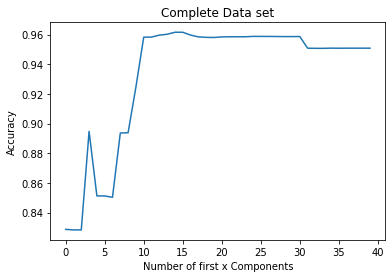

In [66]:
axes = sns.lineplot(data=scores)
axes.set(xlabel = 'Number of first x Components', ylabel = 'Accuracy', title  = 'Complete Data set');

In [69]:
for i in range(len(scores)):
    print(f'{i:3.0f} {scores[i]}')

0 0.8286272105181868
1 0.8282628177916136
2 0.8282628177916136
3 0.8947006754213407
4 0.8511853399441943
5 0.8511807156710144
6 0.8502891558019369
7 0.8936232197704326
8 0.8938479594469739
9 0.9246104743486943
10 0.9582899807722721
11 0.9583500963236103
12 0.9596707887437792
13 0.9602395743449024
14 0.9616139083339577
15 0.9616028100783259
16 0.9597142569116699
17 0.9584805008272824
18 0.9581669751056877
19 0.9580726399328185
20 0.9584721771355588
21 0.9585591134713402
22 0.9585850094011473
23 0.9585674371630639
24 0.9588115987869607
25 0.9588060496591448
26 0.9587764543107937
27 0.9587440843985346
28 0.9586867434111044
29 0.9586858185564684
30 0.9587265121604511
31 0.9508569240629604
32 0.9507598143261833
33 0.9507477912159157
34 0.9508828199927677
35 0.9508310281331531
36 0.9508624731907762
37 0.9508633980454122
38 0.9508624731907762
39 0.9508624731907762


## PCA - df_fast

In [19]:
df_fast = df.sample(frac=0.001, random_state = 1).compute()

In [36]:
x_fast = StandardScaler().fit_transform(df_fast[continuous_vars].values)

*Prining Compoments Composition*

Um eine gute Anzahl von Prinicpal Components zu ermitteln, haben wir uns 50 Stück berechnet und mit jeder neuen Principal Componenet eine logistische Regression berechnet. Die Accuracy wird mit der Anzahl der Komponenten visuell dargestellt. Es lassen sich zwei Knicke feststellen. Der zweite Sprung ist aber zu minimal, dafür dass wir fast 25 neue Komponenten berücksichtigen müssen. Unsere Wahl fällt auf 24 Komponenten.

In [40]:
scores_fast = []
pca_fast = PCA(n_components='mle') #mle
principalComponents_fast = pca_fast.fit_transform(x_fast)

# Create Column Names
col_names = []
for i in range(principalComponents_fast.shape[1]):
    col_names.append(f'PC-{i}')

principalDf_fast = pd.DataFrame(data = principalComponents_fast, columns = col_names)
finalDf_fast = pd.concat([principalDf_fast, df_fast[['Label']].reset_index()['Label']], axis = 1)

train, test, train_lbl, test_lbl = train_test_split(finalDf_fast, finalDf_fast[['Label']].reset_index()['Label'], test_size=1/7.0, random_state=0)

for i in range(finalDf.shape[1]):
    logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=100)
    logisticRegr.fit(train[col_names[:i+1]], train_lbl)
    scores_fast.append(logisticRegr.score(test[col_names[:i+1]], test_lbl))

c:\users\basti\documents\coding\python-venv\data-exploration-project\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\basti\documents\coding\python-venv\data-exploration-project\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

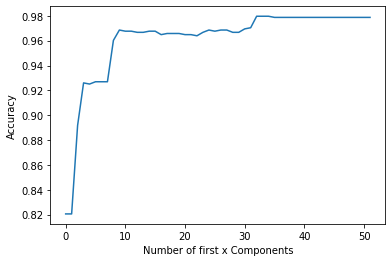

In [42]:
axes = sns.lineplot(data=scores_fast)
axes.set(xlabel = 'Number of first x Components', ylabel = 'Accuracy');

---
## One hot encoding - df_fast

In [24]:
enc = OneHotEncoder()

In [39]:
enc.fit(df_fast[category_vars[1:]])
one_hot_encoding_df = enc.transform(df_fast[category_vars[1:]])

In [20]:
to_be_encoded = ["Protocol", "dst_port_transformed", "src_port_transformed"]
encoder = OneHotEncoder(sparse=False)
df_fast_encoded = pd.DataFrame(encoder.fit_transform(df_fast[to_be_encoded]))
df_fast_encoded.columns = encoder.get_feature_names(to_be_encoded)

In [24]:
to_be_not_encoded = [i for i in category_vars if i not in to_be_encoded][1:]

df_fast_categories = pd.concat([df_fast_encoded, df_fast[to_be_encoded].reset_index()[to_be_encoded]], axis = 1)

In [25]:
df_fast_encoded.head()

,Protocol_0,Protocol_6,Protocol_17,dst_port_transformed_Dynamic,dst_port_transformed_System,dst_port_transformed_User,src_port_transformed_Dynamic,src_port_transformed_System,src_port_transformed_User
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [56]:
finalDf_fast_t = pd.concat([X_encoded, df_fast[['Label']].reset_index()['Label']], axis = 1)


train, test, train_lbl, test_lbl = train_test_split(X_encoded, df_fast[['Label']].reset_index()['Label'], test_size=1/7.0, random_state=0)

In [ ]:
Ron: 93
Ferdi: 80
Basti: 86

In [59]:
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=100)
logisticRegr.fit(train, train_lbl)
logisticRegr.score(test, test_lbl)

0.8908418131359852

In [62]:
logisticRegr.coef_

array([[-3.12362872,  5.39306964, -2.26227158,  1.23352043, -1.22635108,
         0.72649556, -0.71932621,  2.75968025, -2.7525109 ,  0.05284277,
        -0.04567342, -1.8277224 ,  1.83489175, -2.26671342,  2.27388277,
        -2.92290793,  3.29019684, -0.36011956, -2.39036359,  2.60879912,
        -0.21126618]])

In [63]:
logisticRegr.classes_

array(['Benign', 'ddos'], dtype=object)

In [71]:
rest_var = 

['SYN Flag Cnt',
 'RST Flag Cnt',
 'PSH Flag Cnt',
 'ACK Flag Cnt',
 'CWE Flag Count',
 'ECE Flag Cnt']

In [78]:
new_var = [i for i in category_vars if i not in to_be_encoded][1:]

finalDf_fast_t = pd.concat([df_fast_encoded, df_fast[new_var].reset_index()[new_var]], axis = 1)

train, test, train_lbl, test_lbl = train_test_split(finalDf_fast_t, df_fast[['Label']].reset_index()['Label'], test_size=1/7.0, random_state=0)

In [77]:
train.head()

,Protocol_0,Protocol_6,Protocol_17,dst_port_transformed_Dynamic,dst_port_transformed_System,dst_port_transformed_User,src_port_transformed_Dynamic,src_port_transformed_System,src_port_transformed_User,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,CWE Flag Count,ECE Flag Cnt
252,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0
6444,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,1,1,0,0,1
2090,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0
5007,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0
3464,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0


In [ ]:
Ron: +3
Ferdi: -1
Basti: +1

In [79]:
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=100)
logisticRegr.fit(train, train_lbl)
logisticRegr.score(test, test_lbl)

0.8908418131359852

In [81]:
logisticRegr.coef_.shape

(1, 15)

## One hot encoding - df

In [8]:
to_be_encoded = ["Protocol", "dst_port_transformed", "src_port_transformed"]
to_be_not_encoded = [i for i in category_vars if (i not in to_be_encoded and i != "Label")]

In [9]:
df_computed = df[category_vars].compute()

In [8]:
#df_computed_encoded = df[to_be_encoded].compute()
#df_computed_not_encoded = df[to_be_encoded].compute()

In [10]:
df_computed.head()

,Protocol,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,CWE Flag Count,ECE Flag Cnt,Label,dst_port_transformed,src_port_transformed
0,6,0,0,0,1,0,0,ddos,System,User
1,6,1,0,0,0,1,1,ddos,Dynamic,System
2,6,0,0,0,1,0,0,ddos,System,Dynamic
3,6,0,0,0,1,0,0,ddos,System,Dynamic
4,6,1,0,0,0,1,1,ddos,Dynamic,System


In [11]:
encoder = OneHotEncoder(sparse=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df_computed[to_be_encoded]))
df_encoded.columns = encoder.get_feature_names(to_be_encoded)

In [14]:
df_categories = pd.concat([df_encoded, df_computed[to_be_not_encoded].reset_index()[to_be_not_encoded]], axis = 1)

In [15]:
df_categories.head()

,Protocol_0,Protocol_6,Protocol_17,dst_port_transformed_Dynamic,dst_port_transformed_System,dst_port_transformed_User,src_port_transformed_Dynamic,src_port_transformed_System,src_port_transformed_User,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,CWE Flag Count,ECE Flag Cnt
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,1,1
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0,1,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0,1,0,0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,1,1


---
## Cleaning

In [51]:
# Zusammensetzen von lavel
df_prepared = pd.concat([df_categories, df_pca.iloc[:,list(range(24)) + [-1]]], axis = 1)

In [52]:
df_prepared.head()

,Protocol_0,Protocol_6,Protocol_17,dst_port_transformed_Dynamic,dst_port_transformed_System,dst_port_transformed_User,src_port_transformed_Dynamic,src_port_transformed_System,src_port_transformed_User,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,CWE Flag Count,ECE Flag Cnt,PC-0,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12,PC-13,PC-14,PC-15,PC-16,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,Label
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,-2.367263,-1.192238,0.105713,0.070756,-0.292154,-0.359373,-0.677995,-0.192566,-0.541754,-0.656036,1.255855,-0.068330,0.197631,0.178643,0.002600,0.303512,0.128503,-0.397739,0.267402,-0.864736,-0.003395,0.062132,-0.362315,-0.085506,ddos
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,1,1,0.879519,3.794625,-0.370414,-0.431410,1.809650,-0.440046,-0.116166,-3.422342,1.156604,-0.303854,0.403210,0.206379,0.254442,-0.416206,0.588815,0.053183,0.117990,-0.220121,-0.092607,-0.491023,0.512707,-0.380652,0.137580,-0.017587,ddos
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0,1,0,0,-2.299718,-0.967773,0.076351,0.033799,-0.043209,-0.467240,-0.855880,-0.276320,-0.649905,-0.318597,0.826536,-0.038305,-0.182277,0.330721,-0.082806,0.157866,0.266068,-0.496435,1.299893,-1.093637,0.227914,-0.518784,-0.201010,-0.277658,ddos
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0,1,0,0,-2.299863,-0.967792,0.076359,0.033810,-0.043311,-0.467395,-0.856417,-0.275803,-0.648376,-0.318643,0.826985,-0.038427,-0.183361,0.330536,-0.082733,0.156671,0.265889,-0.496214,1.299770,-1.093516,0.227950,-0.518748,-0.200883,-0.277627,ddos
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,1,1,0.915849,3.831009,-0.372726,-0.430558,1.811324,-0.430885,-0.098143,-3.392003,1.141365,-0.293895,0.410076,0.207010,0.264383,-0.410140,0.588188,0.036268,0.112861,-0.234276,-0.091066,-0.493279,0.503341,-0.371479,0.132858,-0.019752,ddos


In [53]:
df_prepared.to_csv("prepared_ds.csv")